### Descripción general simple sobre el Dataset de viviendas y sus múltiples factores que afectan.

#### Datos utilizados:


1.   **Home data Zillow**
'/content/drive/MyDrive/House Market Grupo 12/Datasets/Zillow Economics Data/Zip_time_series.csv'

2.   **Hospitales**
'/content/drive/MyDrive/House Market Grupo 12/Datasets/Hospitals.csv'

3. **Índice de Crimen**
'/content/drive/MyDrive/House Market Grupo 12/Datasets/crime_data_w_population_and_crime_rate.csv'

4. **Escuelas Públicas**
'/content/drive/MyDrive/House Market Grupo 12/Datasets/Public_Schools.csv'

5. **Tasa de Hipoteca**
'/content/drive/MyDrive/House Market Grupo 12/Datasets/Mortgage.csv'

6. **Datos Demográficos (Cantidad de Habitantes)**
'/content/drive/MyDrive/House Market Grupo 12/Datasets/Mortgage.csv'




# Conectamos con el Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerías

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

# Cargamos el Dataset  **Zip_time_series.csv'**

In [ ]:
State_time_series=pd.read_csv('/content/drive/MyDrive/House Market Grupo 12/Datasets/Zillow Economics Data/State_time_series.csv', parse_dates=True)
State_time_series.Date=pd.to_datetime(State_time_series.Date) # Convertimos la columna Date a datetime
State_time_series['Year'] = State_time_series.Date.dt.year # Creamos una columna "Year"
State_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,Year
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN,1996
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN,1996
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN,1996
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN,1996
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN,1996


In [ ]:
State_time_series.columns # Reviso las columnas

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'Median

In [ ]:
# Selecciono las columnas relevantes
State_time_series=State_time_series[['Date','Year', 'RegionName','MedianListingPrice_AllHomes', 'DaysOnZillow_AllHomes','Sale_Prices','ZHVI_AllHomes', 'ZHVI_BottomTier','ZHVI_TopTier','ZHVI_MiddleTier']]

In [ ]:
State_time_series.head()

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier
0,1996-04-30,1996,Alabama,NaN,NaN,NaN,79500.0,45600.0,140200.0,79500.0
1,1996-04-30,1996,Arizona,NaN,NaN,NaN,103600.0,67100.0,168700.0,103600.0
2,1996-04-30,1996,Arkansas,NaN,NaN,NaN,64400.0,38400.0,115200.0,64400.0
3,1996-04-30,1996,California,NaN,NaN,NaN,157900.0,95100.0,270600.0,157900.0
4,1996-04-30,1996,Colorado,NaN,NaN,NaN,128100.0,82700.0,209300.0,128100.0


In [ ]:
# Veo los valores nulos del Dataset
State_time_series.isna().sum()

Date                              0
Year                              0
RegionName                        0
MedianListingPrice_AllHomes    8966
DaysOnZillow_AllHomes          8367
Sale_Prices                    9218
ZHVI_AllHomes                   774
ZHVI_BottomTier                 896
ZHVI_TopTier                    688
ZHVI_MiddleTier                 774
dtype: int64

In [ ]:
# Voy a tratar los valores nulos, reemplazando con el valor de la media
State_time_series['DaysOnZillow_AllHomes'].fillna(value=State_time_series['DaysOnZillow_AllHomes'].median(), inplace=True)
State_time_series['Sale_Prices'].fillna(value=State_time_series['Sale_Prices'].median(), inplace=True)
State_time_series['ZHVI_AllHomes'].fillna(value=State_time_series['ZHVI_AllHomes'].median(), inplace=True)
State_time_series['ZHVI_BottomTier'].fillna(value=State_time_series['ZHVI_BottomTier'].median(), inplace=True)
State_time_series['ZHVI_TopTier'].fillna(value=State_time_series['ZHVI_TopTier'].median(), inplace=True)
State_time_series['ZHVI_MiddleTier'].fillna(value=State_time_series['ZHVI_MiddleTier'].median(), inplace=True)
State_time_series['MedianListingPrice_AllHomes'].fillna(value=State_time_series['MedianListingPrice_AllHomes'].mean(), inplace=True)

In [ ]:
State_time_series.isna().sum() # Ya no hay valores nulo xD

Date                           0
Year                           0
RegionName                     0
MedianListingPrice_AllHomes    0
DaysOnZillow_AllHomes          0
Sale_Prices                    0
ZHVI_AllHomes                  0
ZHVI_BottomTier                0
ZHVI_TopTier                   0
ZHVI_MiddleTier                0
dtype: int64

### Precio medio por pie cuadrado

Text(0.5, 1.0, 'Precios de listado de inmuebles por pie cuadrado en EE. UU.')

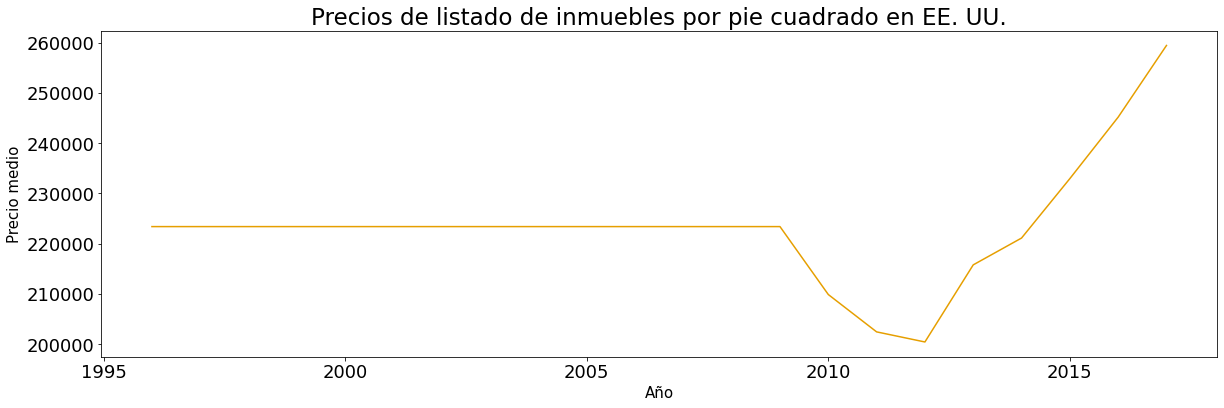

In [ ]:
plt.figure(figsize=(20, 6))
mean_group = State_time_series[['Year','MedianListingPrice_AllHomes']].groupby(['Year'])['MedianListingPrice_AllHomes'].mean()
plt.plot(mean_group, color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Año',fontsize = 15)
plt.ylabel('Precio medio',fontsize = 15)
plt.title('Precios de listado de inmuebles por pie cuadrado en EE. UU.',fontsize = 23)

Podemos observar que a partir del 2012 tiene un crecimiento exponencial.

# Diccionario de Datos
State_time_series.csv

1. **Date:** Fecha.                        
2. **Year:** Año.                         
3. **RegionName:** Estado                    
4. **MedianListingPrice_AllHomes:** el precio medio al que se listaron las casas en varias zonas geográficas.   
5. **DaysOnZillow_AllHomes:** Este contador rastrea la cantidad total de tiempo que ha transcurrido desde que la propiedad se puso a la venta inicialmente.         
6. **Sale_Prices:** Precio de venta.                   
7. **ZHVI_AllHomes:** una medida ajustada estacionalmente del valor típico de la vivienda y los cambios del mercado en una región y un tipo de vivienda determinados. Refleja el valor típico de viviendas en el rango de percentil 35 a 65.                  
8. **ZHVI_BottomTier:** estimadior ZHVI para casas menos costosas.                
9. **ZHVI_TopTier:** estimador zhvi para casas de primer nivel (mas costosas).                  
10. **ZHVI_MiddleTier:** estimador zhvi para viviendias de nivel medio.              


# Cargamos Dataset PERMIT.csv
Un permiso de construcción es un documento de aprobación oficial emitido por una agencia gubernamental que le permite a usted oa su contratista continuar con un proyecto de construcción o remodelación en su propiedad.
**Vamos a analizar si la cantidad de permisos puede ser una indicación para Recesión Económica**.

In [ ]:
Permits=pd.read_csv("/content/drive/MyDrive/House Market Grupo 12/Datasets/PERMIT.csv", parse_dates=True)
Permits.Date=pd.to_datetime(Permits.Date)
Permits['Year'] =Permits.Date.dt.year
Permits= Permits[['Year','Permit']]
Permits=Permits.groupby('Year').sum().astype('int64')
Permits.head()

,Permit
Year,
1960,12040
1961,12805
1962,14246
1963,15939
1964,15417


In [ ]:
# Hacemos un merge al DataFrame State_time_series
State_time_series = State_time_series.merge(Permits, on="Year")
State_time_series.head()

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit
0,1996-04-30,1996,Alabama,223378.492228,108.5,180900.0,79500.0,45600.0,140200.0,79500.0,17029
1,1996-04-30,1996,Arizona,223378.492228,108.5,180900.0,103600.0,67100.0,168700.0,103600.0,17029
2,1996-04-30,1996,Arkansas,223378.492228,108.5,180900.0,64400.0,38400.0,115200.0,64400.0,17029
3,1996-04-30,1996,California,223378.492228,108.5,180900.0,157900.0,95100.0,270600.0,157900.0,17029
4,1996-04-30,1996,Colorado,223378.492228,108.5,180900.0,128100.0,82700.0,209300.0,128100.0,17029


In [ ]:
# Veo si hay valores nulos
State_time_series['Permit'].isna().sum()

0

Text(0.5, 1.0, 'Numero de permisos emitidos, por Año')

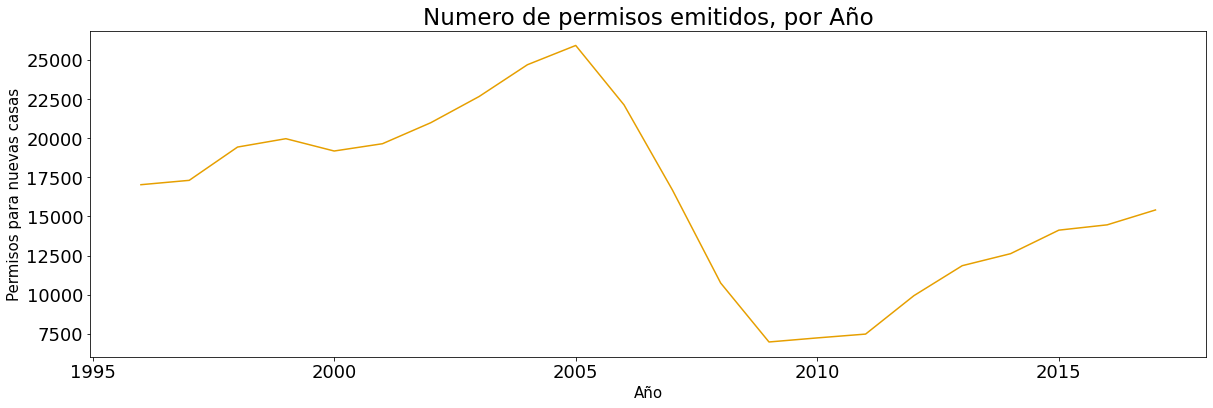

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(State_time_series['Year'],State_time_series['Permit'], color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Año',fontsize = 15)
plt.ylabel('Permisos para nuevas casas',fontsize = 15)
plt.title('Numero de permisos emitidos, por Año',fontsize = 23)

Podemos tomar como un buen indicador de recesión la cantidad de Permisos emitidos. Se aprecia un desplome en la recesión económica del 2008.

Text(0.5, 1.0, 'El valor de venta de la casa disminuye a medida que aumentan los permisos (aumenta la oferta))')

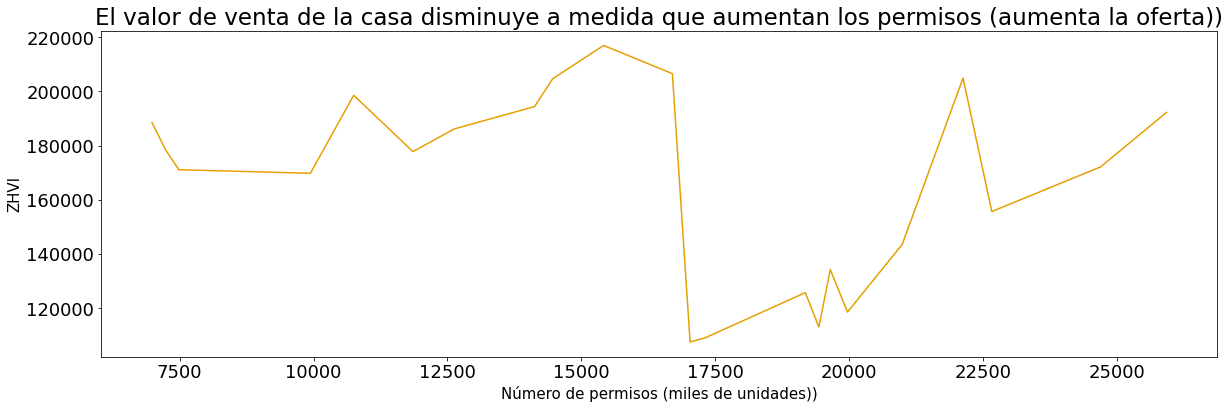

In [ ]:
plt.figure(figsize=(20, 6))
mean_group = State_time_series[['Permit','ZHVI_AllHomes']].groupby(['Permit'])['ZHVI_AllHomes'].mean()
plt.plot(mean_group, color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Número de permisos (miles de unidades))',fontsize = 15)
plt.ylabel('ZHVI',fontsize = 15)
plt.title('El valor de venta de la casa disminuye a medida que aumentan los permisos (aumenta la oferta))',fontsize = 23)

# Listado de días en Zillow

In [ ]:
State_time_series['DaysOnZillow_AllHomes'].isna().sum()

0

Text(0.5, 1.0, 'El valor de venta de la casa disminuye a medida que los listados envejecen en Zillow')

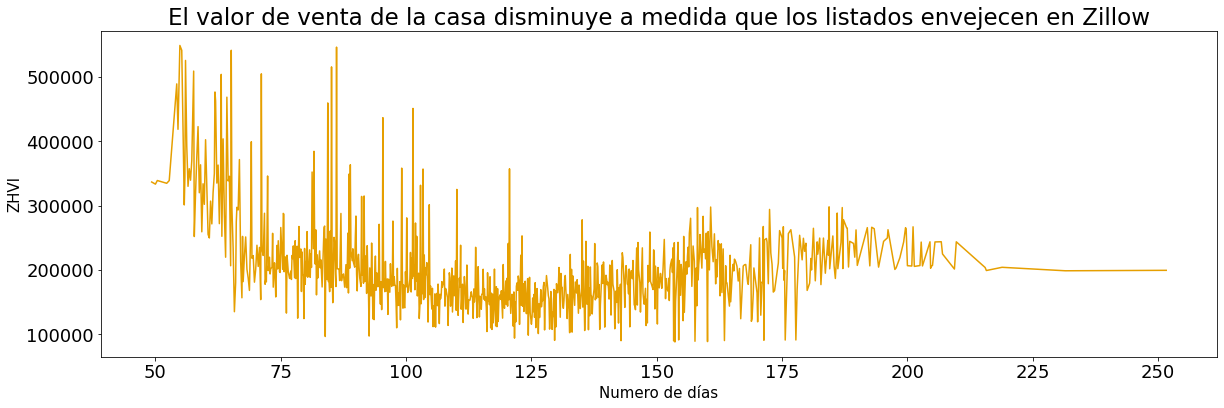

In [ ]:
plt.figure(figsize=(20, 6))
mean_group = State_time_series[['DaysOnZillow_AllHomes','ZHVI_AllHomes']].groupby(['DaysOnZillow_AllHomes'])['ZHVI_AllHomes'].mean()
plt.plot(mean_group, color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Numero de días',fontsize = 15)
plt.ylabel('ZHVI',fontsize = 15)
plt.title('El valor de venta de la casa disminuye a medida que los listados envejecen en Zillow',fontsize = 23)

Text(0, 0.5, 'Días listados en Zillow')

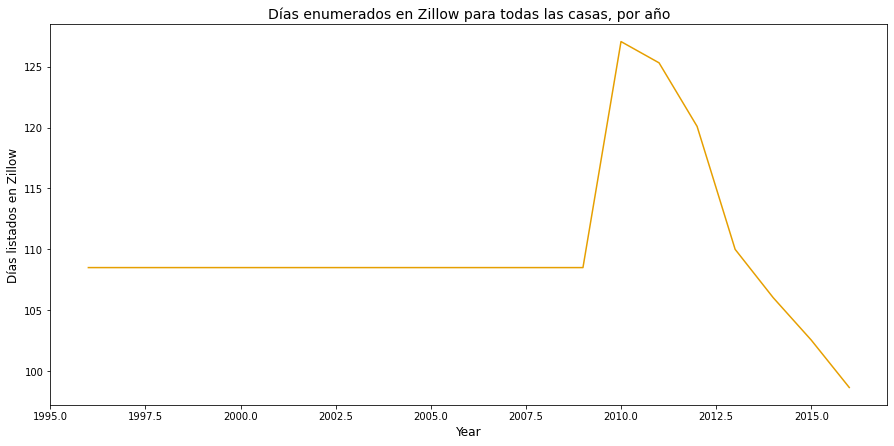

In [ ]:
State_time_series.groupby(['Year']).DaysOnZillow_AllHomes.mean().plot(kind='line', figsize=(15,7), color=[230/255, 159/255, 0])
plt.title('Días enumerados en Zillow para todas las casas, por año', fontsize= 14)
plt.xlabel('Year', fontsize= 12)
plt.ylabel('Días listados en Zillow', fontsize= 12)

Observamos que en el 2008 fue el pico mas alto de días listados en zillow, desde el 2015 para adelante se ve una tendencia a decaer

Text(0, 0.5, 'Días listados en Zillow')

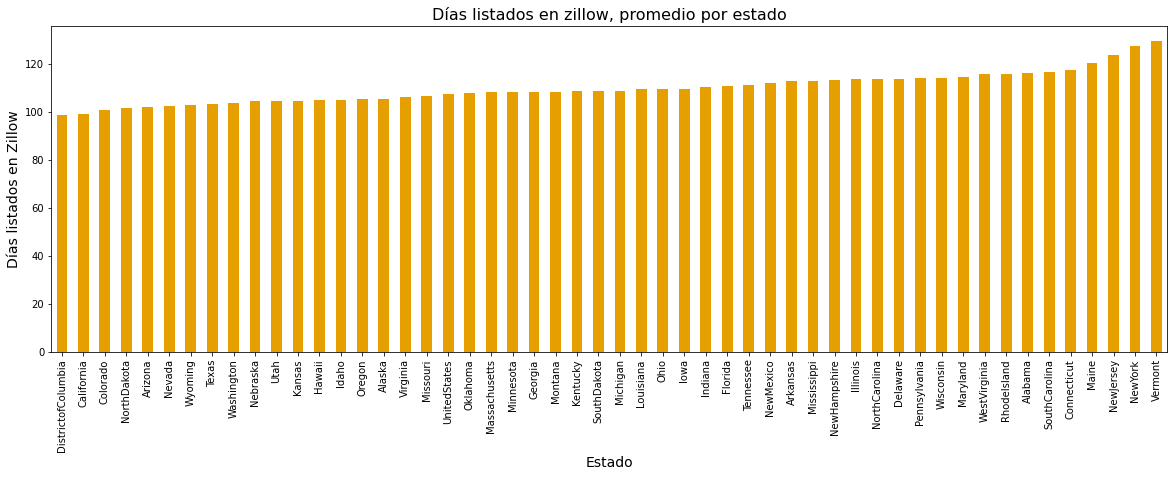

In [ ]:
State_time_series.groupby(['RegionName']).DaysOnZillow_AllHomes.mean().sort_values(ascending= True).plot(kind= 'bar', figsize=(20,6),color=[230/255, 159/255, 0])
plt.title('Días listados en zillow, promedio por estado', fontsize= 16)
plt.xlabel('Estado', fontsize= 14)
plt.ylabel('Días listados en Zillow', fontsize= 14)

# Tasa de Hipotecarias
Cargo el dataset Mortgage.csv

In [ ]:
# Cargo el dataser
Mortgage=pd.read_csv("/content/drive/MyDrive/House Market Grupo 12/Datasets/Mortgage.csv", parse_dates=True)
# Convierto a Datetime la columna Date
Mortgage.Date=pd.to_datetime(Mortgage.Date)
Mortgage['Year'] = Mortgage.Date.dt.year
Mortgage= Mortgage[['Year','Mortgage']]
# agrupo
Mortgage=Mortgage.groupby('Year').median().astype('int64')
Mortgage.tail()

,Mortgage
Year,
2017,3
2018,4
2019,3
2020,3
2021,2


In [ ]:
# Hago un merge a con State_time_series
State_time_series = State_time_series.merge(Mortgage, on="Year")
State_time_series.head()

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,Mortgage
0,1996-04-30,1996,Alabama,223378.492228,108.5,180900.0,79500.0,45600.0,140200.0,79500.0,17029,7
1,1996-04-30,1996,Arizona,223378.492228,108.5,180900.0,103600.0,67100.0,168700.0,103600.0,17029,7
2,1996-04-30,1996,Arkansas,223378.492228,108.5,180900.0,64400.0,38400.0,115200.0,64400.0,17029,7
3,1996-04-30,1996,California,223378.492228,108.5,180900.0,157900.0,95100.0,270600.0,157900.0,17029,7
4,1996-04-30,1996,Colorado,223378.492228,108.5,180900.0,128100.0,82700.0,209300.0,128100.0,17029,7


Text(0.5, 1.0, 'Tasa hipotecaria, por año')

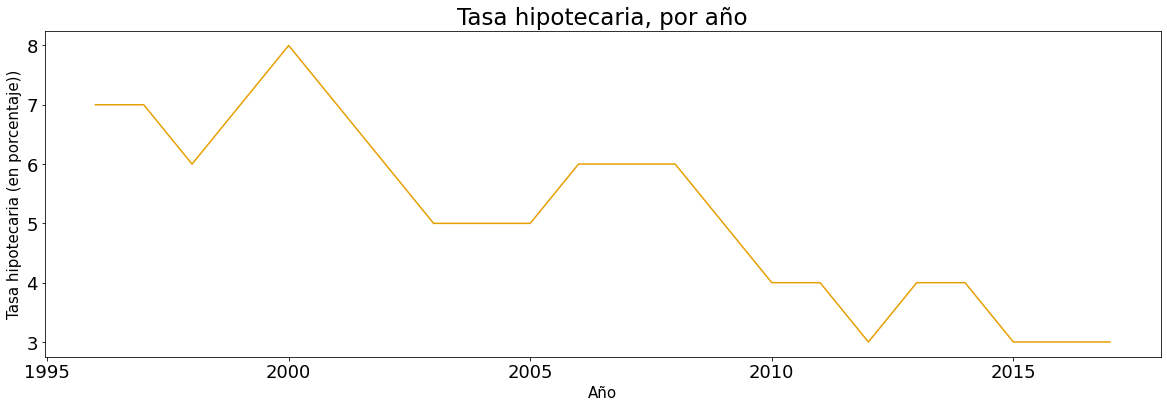

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(State_time_series['Year'],State_time_series['Mortgage'], color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Año',fontsize = 15)
plt.ylabel('Tasa hipotecaria (en porcentaje))',fontsize = 15)
plt.title('Tasa hipotecaria, por año',fontsize = 23)

Text(0.5, 1.0, 'El valor de venta de la casa disminuye a medida que aumenta la tasa hipotecaria (disminuye la demanda))')

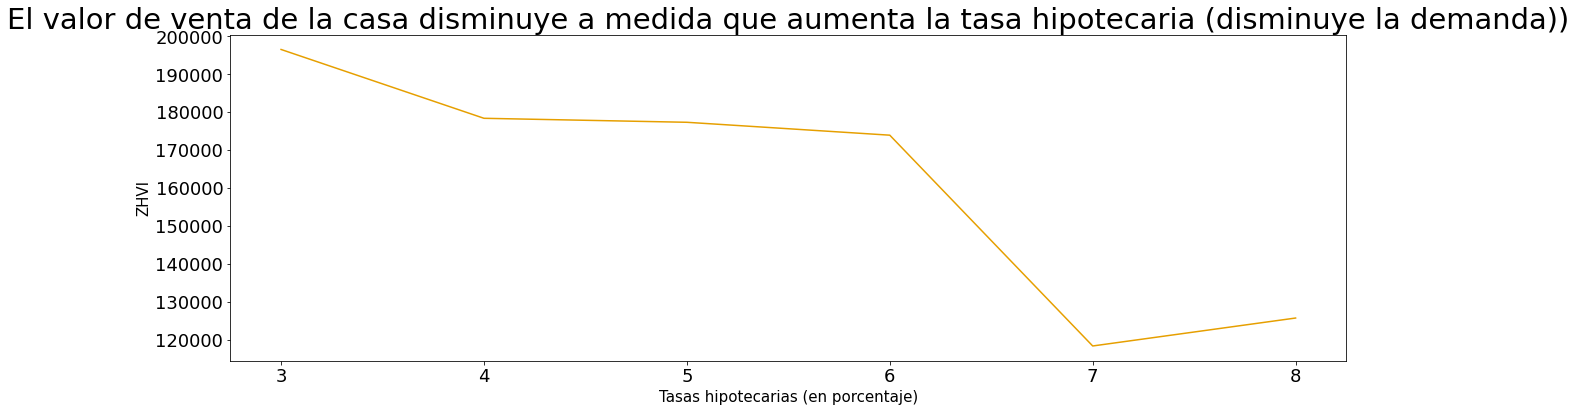

In [ ]:
plt.figure(figsize=(20, 6))
mean_group = State_time_series[['Mortgage','ZHVI_AllHomes']].groupby(['Mortgage'])['ZHVI_AllHomes'].mean()
plt.plot(mean_group, color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Tasas hipotecarias (en porcentaje)',fontsize = 15)
plt.ylabel('ZHVI',fontsize = 15)
plt.title('El valor de venta de la casa disminuye a medida que aumenta la tasa hipotecaria (disminuye la demanda))',fontsize=29)

# Tasa de Desempleo


In [ ]:
Unemployment=pd.read_csv("/content/drive/MyDrive/House Market Grupo 12/Datasets/output.csv", parse_dates=True)
Unemployment['Unemployment_Rate'] = Unemployment['Rate']
Unemployment= Unemployment[['Year','Unemployment_Rate']]
Unemployment=Unemployment.groupby('Year').median().astype('int64')
Unemployment.tail()


,Unemployment_Rate
Year,
2012,7
2013,6
2014,5
2015,5
2016,4


Unemployment_Rate: Es la tasa porcentual por año, a nivel nacional

In [ ]:
# Hago merge con State_time_series
State_time_series = State_time_series.merge(Unemployment, on="Year")
State_time_series.head()

,Date,Year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Permit,Mortgage,Unemployment_Rate
0,1996-04-30,1996,Alabama,223378.492228,108.5,180900.0,79500.0,45600.0,140200.0,79500.0,17029,7,5
1,1996-04-30,1996,Arizona,223378.492228,108.5,180900.0,103600.0,67100.0,168700.0,103600.0,17029,7,5
2,1996-04-30,1996,Arkansas,223378.492228,108.5,180900.0,64400.0,38400.0,115200.0,64400.0,17029,7,5
3,1996-04-30,1996,California,223378.492228,108.5,180900.0,157900.0,95100.0,270600.0,157900.0,17029,7,5
4,1996-04-30,1996,Colorado,223378.492228,108.5,180900.0,128100.0,82700.0,209300.0,128100.0,17029,7,5


Text(0.5, 1.0, 'Tasa de desempleo por año')

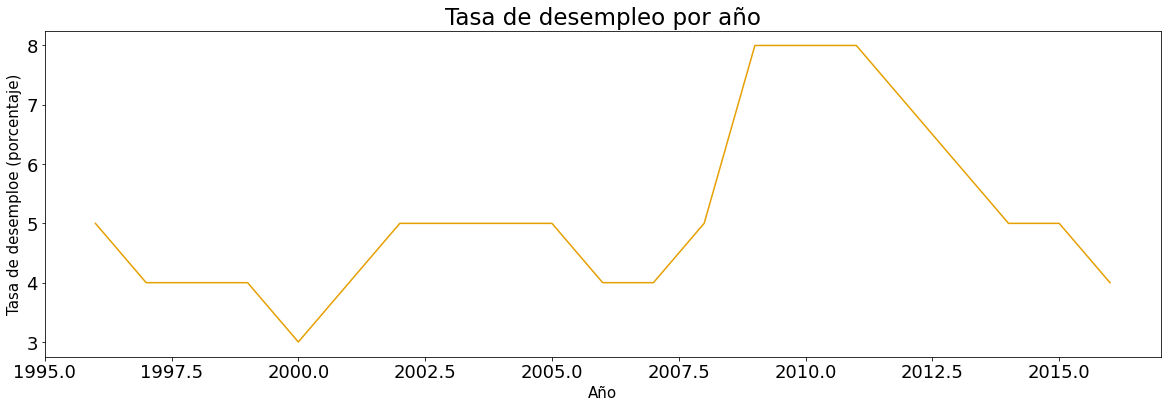

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(State_time_series['Year'],State_time_series['Unemployment_Rate'], color=[230/255, 159/255, 0])
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Año',fontsize = 15)
plt.ylabel('Tasa de desemploe (porcentaje)',fontsize = 15)
plt.title('Tasa de desempleo por año',fontsize = 23)

# Hospitales

In [ ]:
hospitals = pd.read_csv(r"/content/drive/MyDrive/House Market Grupo 12/Datasets/Hospitals.csv")
hospitals.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-94.945477,29.747620,8497,76777520,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...,1700 JAMES BOWIE DRIVE,BAYTOWN,TX,77520,NOT AVAILABLE,...,2017-12-18T00:00:00.000Z,http://www.houstonmethodist.org/locations/san-...,NOT AVAILABLE,NOT AVAILABLE,48.0,NON-PROFIT,-999.0,182.0,NOT AVAILABLE,Y
1,-82.881843,40.027143,8498,129043230,"WOODS AT PARKSIDE,THE",349 OLDE RIDENOUR ROAD,COLUMBUS,OH,43230,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.thewoodsatparkside.com/,1815,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,50.0,NOT AVAILABLE,NOT AVAILABLE
2,-84.168027,39.774242,8499,130045404,DAYTON CHILDREN'S HOSPITAL,ONE CHILDRENS PLAZA,DAYTON,OH,45404,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.childrensdayton.org/cms/home/index....,1411,NOT AVAILABLE,39.0,NON-PROFIT,-999.0,155.0,PEDIATRIC LEVEL II,Y
3,-80.632972,41.005169,8500,128844512,VIBRA HOSPITAL OF MAHONING VALLEY,8049 SOUTH AVENUE,BOARDMAN,OH,44512,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.mahoningvalleyhospital.com/,1428,MAHONING VALLEY HOSPITAL BOARDMAN CAMPUS,39.0,PROPRIETARY,-999.0,45.0,NOT AVAILABLE,NOT AVAILABLE
4,-84.199398,39.747740,8501,129845417,HAVEN BEHAVIORAL SENIOR CARE OF DAYTON,"ONE ELIZABETH PLACE,E3 SUITE A",DAYTON,OH,45417,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,https://dayton.havenbehavioral.com/,1506,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,32.0,NOT AVAILABLE,NOT AVAILABLE


In [ ]:
hospitals_per_county = hospitals['COUNTYFIPS'].value_counts().to_frame()
hospitals_per_county.reset_index(level=0, inplace=True)
hospitals_per_county.rename(index=str, columns={"index": "FIPS", "COUNTYFIPS": "NumberOfHospitals"}, inplace=True)
hospitals_per_county.dropna(inplace=True)
hospitals_per_county= hospitals_per_county[hospitals_per_county["FIPS"] != "NOT AVAILABLE"]
hospitals_per_county["FIPS"] = hospitals_per_county["FIPS"].astype("int64")

hospitals_per_county.head()

,FIPS,NumberOfHospitals
0,6037,131
1,48201,93
2,17031,73
3,4013,73
4,48113,58
